# Regresión Lineal
Primero importamos las dependencias

In [1]:
# Este método permite fraccionar el dataset
from sklearn.model_selection import  train_test_split
# Es el paquete que contiene las clases de Regresiones Lineales
from sklearn import linear_model
# Importamos el paquete donde se incluyen los datsets dummies
from sklearn import datasets

# Después de las principales vienen las librerías auxiliares
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Primero buscamos un dataset para pracitcar
wine_dataset = datasets.load_wine()

In [5]:
print(wine_dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [12]:
df = pd.DataFrame(wine_dataset.data, columns=wine_dataset.feature_names)

In [13]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [14]:
df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


In [15]:
# Inicializamos el modelo
linear_reg = linear_model.LinearRegression()

In [42]:
data_x = df.flavanoids
data_y = df.total_phenols
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y)

In [43]:
# Hacemos el reformado de nuestros arrays
train_x = np.array(train_x).reshape(-1, 1)
test_x = np.array(test_x).reshape(-1, 1)

In [44]:
linear_reg.fit(train_x, train_y)

LinearRegression()

### Una vez entrenado el modelo procedemos a obtener los valores de la recta

In [45]:
print(f'Pendiente (m): {round(linear_reg.coef_[0], 4)}')
print(f'Coeficiente de intersección con el eje "y" (b): {round(linear_reg.intercept_)}')
print(f' y = {round(linear_reg.coef_[0], 4)}x {round(linear_reg.intercept_)}')


Pendiente (m): 0.5414
Coeficiente de intersección con el eje "y" (b): 1.0
 y = 0.5414x 1.0


### Recién podemos hacer predicciones

In [46]:
# Esto se ejecuta para cada nueva predicción
y_predicted = linear_reg.predict(test_x)

In [47]:
y_predicted

array([2.64386553, 2.05920722, 2.40567141, 2.42191191, 1.57740546,
       1.53409744, 1.74522405, 2.69258706, 2.80085712, 2.70341407,
       1.61529998, 1.92386965, 1.52327043, 1.91304264, 2.08086123,
       2.99032972, 2.83333814, 2.90912718, 1.88597513, 2.24867982,
       1.58823247, 1.88597513, 1.62071348, 2.56807649, 2.42732542,
       1.99965869, 3.04446475, 2.3948444 , 2.93078119, 2.66010604,
       2.12416926, 2.36236338, 2.62221152, 1.56116495, 2.91454068,
       2.07003423, 2.15665027, 1.4691354 , 2.5789035 , 2.52476847,
       2.82251113, 2.63845203, 1.4637219 , 2.70341407, 2.38401739])

In [48]:
test_y.to_numpy()

array([2.62, 1.61, 2.2 , 2.13, 1.35, 1.65, 1.6 , 2.95, 2.85, 2.65, 1.8 ,
       1.72, 1.48, 2.53, 1.92, 3.15, 3.  , 2.8 , 1.63, 2.2 , 1.68, 1.51,
       2.05, 2.6 , 2.45, 1.38, 3.27, 2.4 , 2.98, 2.6 , 1.95, 2.2 , 2.53,
       1.7 , 2.74, 2.2 , 2.1 , 1.62, 2.2 , 2.45, 2.8 , 2.4 , 1.28, 2.6 ,
       2.23])

In [49]:
# Obtenemos la calificación del modelo
print(f'Score: {round(linear_reg.score(test_x, test_y) * 100, 2)}%')

Score: 81.58%


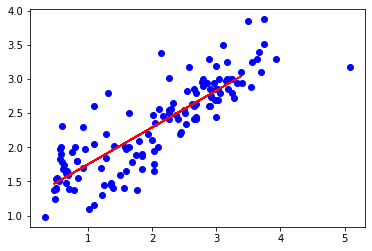

In [50]:
# Para graficar necesitamos los siguiente
plt.scatter(train_x, train_y, c='b')
plt.plot(test_x, y_predicted, c='r')
plt.show()

In [51]:
corr = df.corr()
corr.style.background_gradient()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100
